<a href="https://colab.research.google.com/github/hyuntaedo/Machine_learning_Concept/blob/main/FastCampus_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<strong>Data Preprocess (MNIST)</strong>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

##<strong>데이터 불러오기</strong>
- TensorFlow에서 제공해주는 데이터셋(MNIST)예제 불러오기


In [2]:
from tensorflow.keras import datasets

- 데이터 shape확인하기


In [3]:
mnist = datasets.mnist

In [50]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

#<strong>Image Dataset 들여다보기</strong>
- 불러온 데이터셋에서 이미지 데이터 하나만 뽑아서 시각화 확인



- 데이터 하나만 뽑기


In [51]:
image = X_train[0]
image.shape

(28, 28)

- 시각화해서 확인


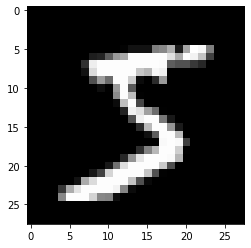

In [21]:
plt.imshow(image,'gray')
plt.show()

##<strong>Channel 관련</strong>
- [Batch Size, Height, Chaneel]
- GraySacle이라면 1, RGB이면 3으로 만들어줘야함


- 다시 shape로 데이터 확인


In [22]:
X_train.shape

(60000, 28, 28)

- 데이터 차원수 늘리기(numpy)

In [14]:
X_train = np.expand_dims(X_train,-1) # -1이면 마지막에 GraySclae로 만들어줌
X_train.shape

(60000, 28, 28, 1)

- TensorFlow로 데이터 차원 수 늘리기(tensorflow)

In [23]:
new_X_train = tf.expand_dims(X_train,-1)
new_X_train.shape

TensorShape([60000, 28, 28, 1])

- TensorFlow 공식홈페이지에서 가져온 방법 tf.newaxis


In [24]:
reshape = X_train.reshape([60000,28,28,1])
reshape.shape

(60000, 28, 28, 1)

- 주의사항
  - matplotlib로 이미지 시각화 할 때는 gray scale의 이미지는 3번째 dimension이 없으므로, 2개의 dimension으로 grayscale로 차원조절해서 넣어줘야 함
  

In [25]:
X_train = X_train[...,tf.newaxis]

In [26]:
X_train.shape


(60000, 28, 28, 1)

- 다시 시각화


In [29]:
np.squeeze(X_train[0]).shape

(28, 28)

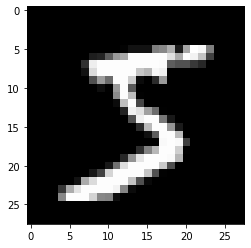

In [32]:
display = np.squeeze(X_train[0])
plt.imshow(display,'gray')
plt.show()

#<strong>Label Dataset 들여다보기</strong>
 - Label하나만 뽑아서, Image와 비교하여 제대로 들어갔는지, 어떤식으로 저장되어있는지 확인
 

- Label하나만 뽑아보기


In [33]:
y_train.shape

(60000,)

In [35]:
y_train[0]

5

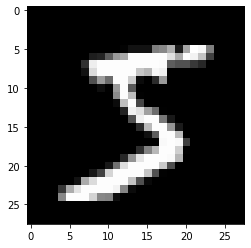

In [39]:
plt.imshow(np.squeeze(X_train[0]),'gray')
plt.show()

In [40]:
y_train[0]

5

- Label 시각화


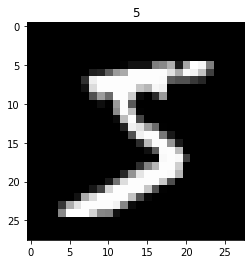

In [42]:
plt.title(y_train[0])
plt.imshow(np.squeeze(X_train[0]),'gray')
plt.show()

#<strong>One Hot Encoding</strong>
- 컴퓨터가 이해할 수 있는 형태로 변환해서, Label을 주도록 함
#<strong>[0,1,0,0,0,0,0,0,0,0]</strong>
- tensorflow.keras.utils.to_categorical


In [43]:
# 5
[0,0,0,0,0,1,0,0,0,0]
# 9 
[0,0,0,0,0,0,0,0,0,1]
# classification이다.

from tensorflow.keras.utils import to_categorical

- 1을 예시로 one hot encoding


In [47]:
to_categorical(1,5)

array([0., 1., 0., 0., 0.], dtype=float32)

- label을 확인해서 to_categorical 사용


In [48]:
label = y_train[0]
label

5

In [49]:
label_onehot = to_categorical(label,num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- onehot encoding으로 바꾼것과 이미지 확인하기


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


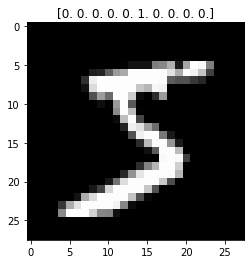

In [55]:
plt.title(label_onehot)
plt.imshow(X_train[0],"gray")
plt.show()